In [2]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

with open("../data/result/generated_eval_data_test60.json", 'r') as f:
    generate_eval_data_dict = json.load(f)
print("测试结果共计模型数量:",len(generate_eval_data_dict))

测试结果共计模型数量: 49


## 参数量

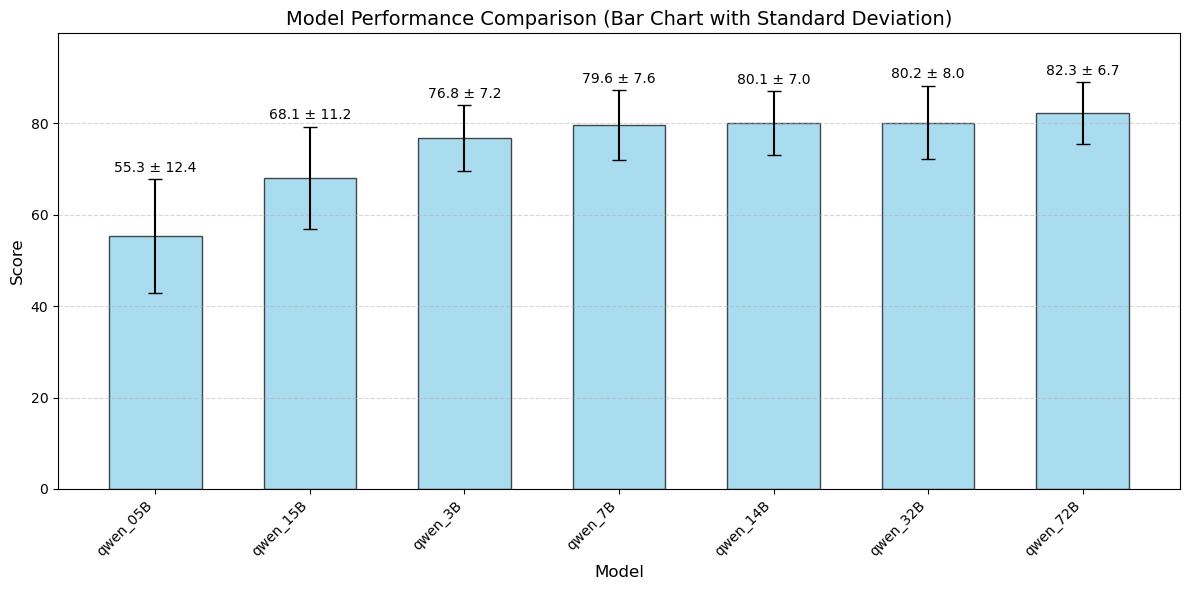

In [ ]:
# 2. 筛选指定的模型（示例：选择前3名）
#selected_models = df.head(3)['Model'].tolist()  # 这里可以手动替换为你想要的模型列表
stats_list = []
for model_name, data in generate_eval_data_dict.items():
    scores = np.array(data['score'])
    stats = {
        'Model': model_name,
        'Mean': np.mean(scores),
        'Std': np.std(scores),
        'Max': np.max(scores),
        'Min': np.min(scores),
        '25%': np.percentile(scores, 25),  # 第一四分位数 (Q1)
        '50%': np.percentile(scores, 50),  # 中位数 (Q2)
        '75%': np.percentile(scores, 75),  # 第三四分位数 (Q3)
    }
    stats_list.append(stats)
df = pd.DataFrame(stats_list)
df = df.sort_values(by='Mean', ascending=False)
Math_score = {'qwen_05B': 10.35, 'qwen_15B':22.05, 'qwen_3B':36.78, 'qwen_7B':50.00, 'qwen_14B':54.76, 'qwen_32B':62.54, 'qwen_72B':59.82}

filtered_df = df[df['Model'].isin(Math_score.keys())].sort_values('Mean')

# 3. 绘制柱状图（带误差棒）
plt.figure(figsize=(12, 6))

# 创建柱状图
bars = plt.bar(
    x=filtered_df['Model'],
    height=filtered_df['Mean'],
    yerr=filtered_df['Std'],  # 添加误差棒（标准差）
    capsize=5,               # 误差棒端帽长度
    color='skyblue',         # 柱状图颜色
    edgecolor='black',       # 边框颜色
    alpha=0.7,              # 透明度
    width=0.6              # 柱状图宽度
)

# 添加数据标签（在柱子上方）
for bar, mean, std in zip(bars, filtered_df['Mean'], filtered_df['Std']):
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2.,
        height + std + 1,  # 在柱子上方+标准差的位置
        f'{mean:.1f} ± {std:.1f}',
        ha='center',
        va='bottom',
        fontsize=10
    )

# 装饰图表
plt.title('Model Performance Comparison (Bar Chart with Standard Deviation)', fontsize=14)
plt.xlabel('Model', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.ylim(0, filtered_df['Mean'].max() + filtered_df['Std'].max() + 5)  # 自动调整y轴范围
plt.grid(axis='y', linestyle='--', alpha=0.5)

# 旋转x轴标签（如果名称较长）
plt.xticks(rotation=45, ha='right')

plt.tight_layout()  # 自动调整布局
plt.savefig('../data/figure/model_comparison_bar.png', dpi=300, bbox_inches='tight')  # 保存图片
plt.show()

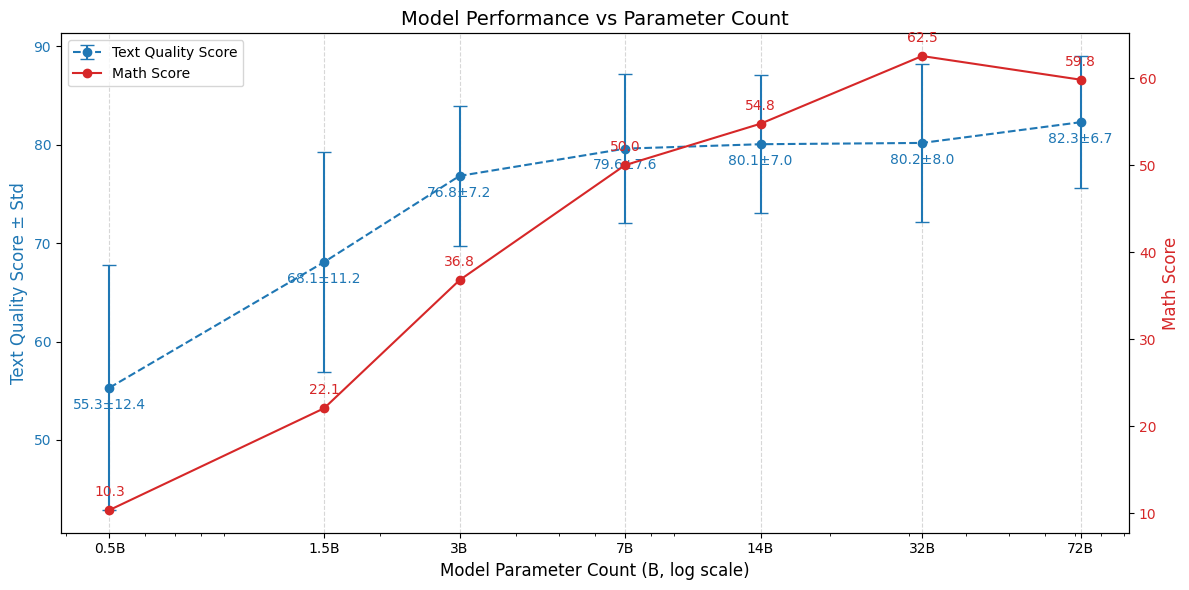

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# 数据准备
Math_score = {'qwen_05B': 10.35, 'qwen_15B':22.05, 'qwen_3B':36.78, 
              'qwen_7B':50.00, 'qwen_14B':54.76, 'qwen_32B':62.54, 'qwen_72B':59.82}
param_counts = {
    'qwen_05B': 0.5,
    'qwen_15B': 1.5,
    'qwen_3B': 3,
    'qwen_7B': 7,
    'qwen_14B': 14,
    'qwen_32B': 32,
    'qwen_72B': 72
}

# 确保数据顺序一致
models = sorted(Math_score.keys(), key=lambda x: param_counts[x])
x_values = [param_counts[model] for model in models]
math_scores = [Math_score[model] for model in models]
means = [filtered_df[filtered_df['Model']==model]['Mean'].values[0] for model in models]
stds = [filtered_df[filtered_df['Model']==model]['Std'].values[0] for model in models]

# 创建图形和双y轴
fig, ax1 = plt.subplots(figsize=(12, 6))

# 左y轴：Text Quality Score (改为蓝色)
color = 'tab:blue'
ax1.set_xscale('log')  # x轴对数刻度
ax1.set_xlabel('Model Parameter Count (B, log scale)', fontsize=12)
ax1.set_ylabel('Text Quality Score ± Std', color=color, fontsize=12)
# 绘制带误差棒的散点图
ax1.errorbar(x_values, means, yerr=stds, fmt='o--', color=color, 
             capsize=5, label='Text Quality Score')
ax1.tick_params(axis='y', labelcolor=color)

# 右y轴：Math Score (改为红色)
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Math Score', color=color, fontsize=12)
ax2.plot(x_values, math_scores, 'o-', color=color, label='Math Score')
ax2.tick_params(axis='y', labelcolor=color)

# 添加数据标签
for i, (x, math, mean, std) in enumerate(zip(x_values, math_scores, means, stds)):
    ax2.annotate(f'{math:.1f}', (x, math), textcoords="offset points", 
                 xytext=(0,10), ha='center', color='tab:red')
    ax1.annotate(f'{mean:.1f}±{std:.1f}', (x, mean), textcoords="offset points",
                 xytext=(0,-15), ha='center', color='tab:blue')

# 装饰图表
plt.title('Model Performance vs Parameter Count', fontsize=14)
ax1.grid(axis='x', linestyle='--', alpha=0.5)
ax1.set_xticks(x_values)
ax1.set_xticklabels([f'{x}B' for x in x_values])

# 合并图例
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

plt.tight_layout()
plt.savefig('../data/figure/model_comparison_dual_axis.png', dpi=300, bbox_inches='tight')
plt.show()

## 量化

In [5]:
from scipy import stats
import numpy as np

# 提取数据
scores_qwen = np.array(generate_eval_data_dict["qwen_7B"]['score'])
scores_int8 = np.array(generate_eval_data_dict["qwen_7B_int8"]['score'])
scores_int4 = np.array(generate_eval_data_dict["qwen_7B_int4"]['score'])

# 1. 正态性检验（Shapiro-Wilk）
_, p_qwen = stats.shapiro(scores_qwen)
_, p_int8 = stats.shapiro(scores_int8)
_, p_int4 = stats.shapiro(scores_int4)

use_parametic = all(p > 0.05 for p in [p_qwen, p_int8, p_int4])

# 2. 执行检验
alpha = 0.05
corrected_alpha = alpha / 3

results = []
if use_parametic:
    # 配对t检验
    t1, p1 = stats.ttest_rel(scores_qwen, scores_int8)
    t2, p2 = stats.ttest_rel(scores_qwen, scores_int4)
    t3, p3 = stats.ttest_rel(scores_int8, scores_int4)
    test_type = "Paired t-test"
else:
    # Wilcoxon检验
    t1, p1 = stats.wilcoxon(scores_qwen, scores_int8)
    t2, p2 = stats.wilcoxon(scores_qwen, scores_int4)
    t3, p3 = stats.wilcoxon(scores_int8, scores_int4)
    test_type = "Wilcoxon signed-rank test"

# 3. 输出结果
print(f"Qwen 7B series Using {test_type} (corrected alpha={corrected_alpha:.4f})")
print(f"qwen7B vs 7B_int8: p={p1:.6f}", "*" if p1 < corrected_alpha else "")
print(f"qwen7B vs 7B_int4: p={p2:.6f}", "*" if p2 < corrected_alpha else "")
print(f"7B_int8 vs 7B_int4: p={p3:.6f}", "*" if p3 < corrected_alpha else "")


Qwen 7B series Using Wilcoxon signed-rank test (corrected alpha=0.0167)
qwen7B vs 7B_int8: p=0.601201 
qwen7B vs 7B_int4: p=0.084958 
7B_int8 vs 7B_int4: p=0.200222 


In [6]:
from tabulate import tabulate

# 定义表头
headers = ["量化", "TQ", "MMLU", "C-评估", "IEval"]
# 定义Qwen2-7B-指令模型的数据
data = [
    ["BF16型", 79.6, 70.5, 77.2, 53.1],
    ["GPTQ-INT8", 78.76, 69.1, 76.7, 52.9],
    ["GPTQ-INT4", 77.56, 67.8, 75.2, 49.4]
]

# 输出表格
print(tabulate(data, headers=headers, tablefmt="grid"))

+-----------+-------+--------+----------+---------+
| 量化      |    TQ |   MMLU |   C-评估 |   IEval |
+===========+=======+========+==========+=========+
| BF16型    | 79.6  |   70.5 |     77.2 |    53.1 |
+-----------+-------+--------+----------+---------+
| GPTQ-INT8 | 78.76 |   69.1 |     76.7 |    52.9 |
+-----------+-------+--------+----------+---------+
| GPTQ-INT4 | 77.56 |   67.8 |     75.2 |    49.4 |
+-----------+-------+--------+----------+---------+


## Reasoning

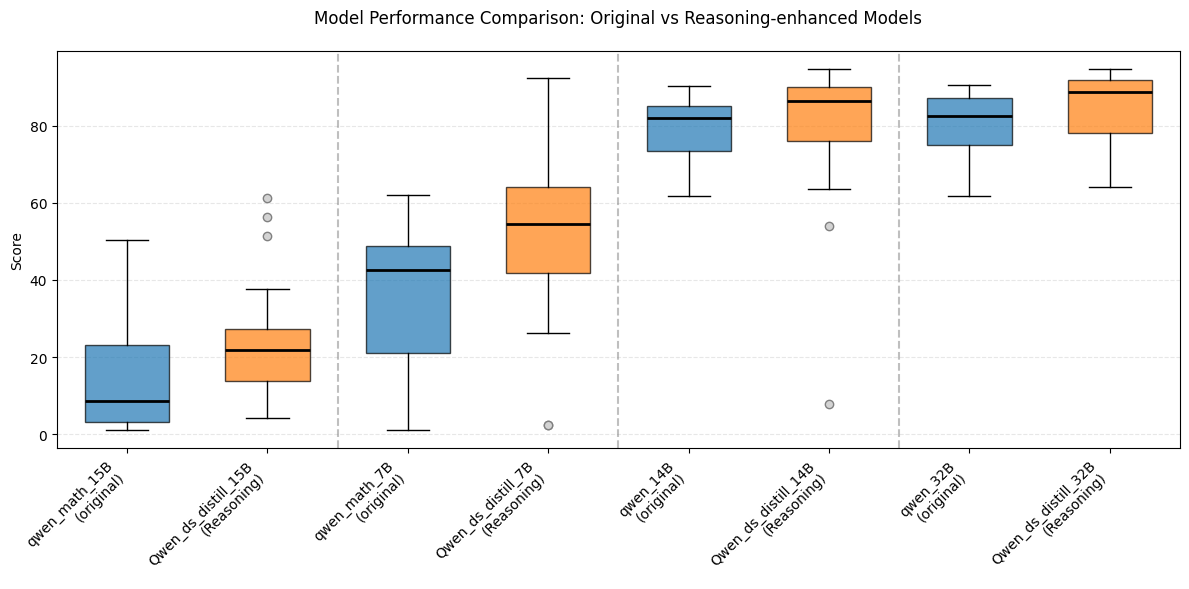

In [ ]:
comparison_groups = [
    ("qwen_math_15B", "Qwen_ds_distill_15B"),
    ("qwen_math_7B", "Qwen_ds_distill_7B"),
    ("qwen_14B", "Qwen_ds_distill_14B"),
    ("qwen_32B", "Qwen_ds_distill_32B"),
]

plt.figure(figsize=(12, 6))

# 准备绘图数据
plot_data = []
group_labels = []
for group in comparison_groups:
    plot_data.extend([generate_eval_data_dict[group[0]]['score'], 
                     generate_eval_data_dict[group[1]]['score']])
    group_labels.extend([f"{group[0]}\n(original)", f"{group[1]}\n(Reasoning)"])

# 绘制箱线图（移除均值标记，调整异常值样式）
box = plt.boxplot(plot_data, 
                 positions=np.arange(len(plot_data)), 
                 widths=0.6,
                 patch_artist=True,
                 showmeans=False,  # 不显示均值三角形
                 showfliers=True,  # 仍然显示异常值
                 flierprops=dict(
                     marker='o',       # 圆形标记
                     markerfacecolor='lightgray',  # 浅灰色填充
                     markersize=6,     # 较小尺寸
                     markeredgecolor='gray'  # 灰色边框
                 ))

# 设置更鲜明的颜色对比
colors = ['#1f77b4', '#ff7f0e'] * len(comparison_groups)  # 使用标准对比色
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)  # 轻微透明效果

# 增强中位数线显示
for median in box['medians']:
    median.set(color='black', linewidth=2)

# 添加分组分隔线和标签
for i in range(1, len(comparison_groups)):
    plt.axvline(x=2*i-0.5, color='gray', linestyle='--', alpha=0.5)



plt.xticks(np.arange(len(plot_data)), group_labels, rotation=45, ha='right')
plt.ylabel('Score')
plt.title('Model Performance Comparison: Original vs Reasoning-enhanced Models', pad=20)
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.savefig('../data/figure//model_comparison_reasoning.png', dpi=300, bbox_inches='tight')
plt.show()

## Max tokens of Models

In [16]:
from scipy import stats
import numpy as np

# 提取数据
scores_qwen = np.array(generate_eval_data_dict["kimi"]['score'])
scores_int8 = np.array(generate_eval_data_dict["kimi_32k"]['score'])
scores_int4 = np.array(generate_eval_data_dict["kimi_128k"]['score'])

# 1. 正态性检验（Shapiro-Wilk）
_, p_qwen = stats.shapiro(scores_qwen)
_, p_int8 = stats.shapiro(scores_int8)
_, p_int4 = stats.shapiro(scores_int4)

use_parametic = all(p > 0.05 for p in [p_qwen, p_int8, p_int4])

# 2. 执行检验
alpha = 0.05
corrected_alpha = alpha / 3

results = []
if use_parametic:
    # 配对t检验
    t1, p1 = stats.ttest_rel(scores_qwen, scores_int8)
    t2, p2 = stats.ttest_rel(scores_qwen, scores_int4)
    t3, p3 = stats.ttest_rel(scores_int8, scores_int4)
    test_type = "Paired t-test"
else:
    # Wilcoxon检验
    t1, p1 = stats.wilcoxon(scores_qwen, scores_int8)
    t2, p2 = stats.wilcoxon(scores_qwen, scores_int4)
    t3, p3 = stats.wilcoxon(scores_int8, scores_int4)
    test_type = "Wilcoxon signed-rank test"

# 3. Output test results
print(f"Kimi series using {test_type} (corrected alpha={corrected_alpha:.4f})")
print(f"kimi vs kimi_32k: p={p1:.6f}", "*" if p1 < corrected_alpha else "")
print(f"kimi vs kimi_128k: p={p2:.6f}", "*" if p2 < corrected_alpha else "")
print(f"kimi_32k vs kimi_128k: p={p3:.6f}", "*" if p3 < corrected_alpha else "")
print("\n")

# 4. Create and display summary statistics table
table_data = [
    ["Model", "Mean", "Std", "Median", "Min", "Max", "Shapiro p-value"],
    ["kimi", 
     np.mean(scores_qwen), 
     np.std(scores_qwen), 
     np.median(scores_qwen),
     np.min(scores_qwen),
     np.max(scores_qwen),
     f"{p_qwen:.4f}"],
    ["kimi_32k", 
     np.mean(scores_int8), 
     np.std(scores_int8), 
     np.median(scores_int8),
     np.min(scores_int8),
     np.max(scores_int8),
     f"{p_int8:.4f}"],
    ["kimi_128k", 
     np.mean(scores_int4), 
     np.std(scores_int4), 
     np.median(scores_int4),
     np.min(scores_int4),
     np.max(scores_int4),
     f"{p_int4:.4f}"]
]

print("Summary Statistics:")
print(tabulate(table_data, headers="firstrow", floatfmt=".2f", tablefmt="grid"))

Kimi series using Wilcoxon signed-rank test (corrected alpha=0.0167)
kimi vs kimi_32k: p=0.502918 
kimi vs kimi_128k: p=0.365213 
kimi_32k vs kimi_128k: p=0.230162 


Summary Statistics:
+-----------+--------+-------+----------+-------+-------+-------------------+
| Model     |   Mean |   Std |   Median |   Min |   Max |   Shapiro p-value |
+===========+========+=======+==========+=======+=======+===================+
| kimi      |  76.53 |  8.55 |    75.81 | 55.21 | 89.96 |              0.08 |
+-----------+--------+-------+----------+-------+-------+-------------------+
| kimi_32k  |  77.24 |  7.92 |    75.89 | 61.82 | 91.51 |              0.03 |
+-----------+--------+-------+----------+-------+-------+-------------------+
| kimi_128k |  75.67 |  6.94 |    74.95 | 59.25 | 91.36 |              0.81 |
+-----------+--------+-------+----------+-------+-------+-------------------+


## Special Model

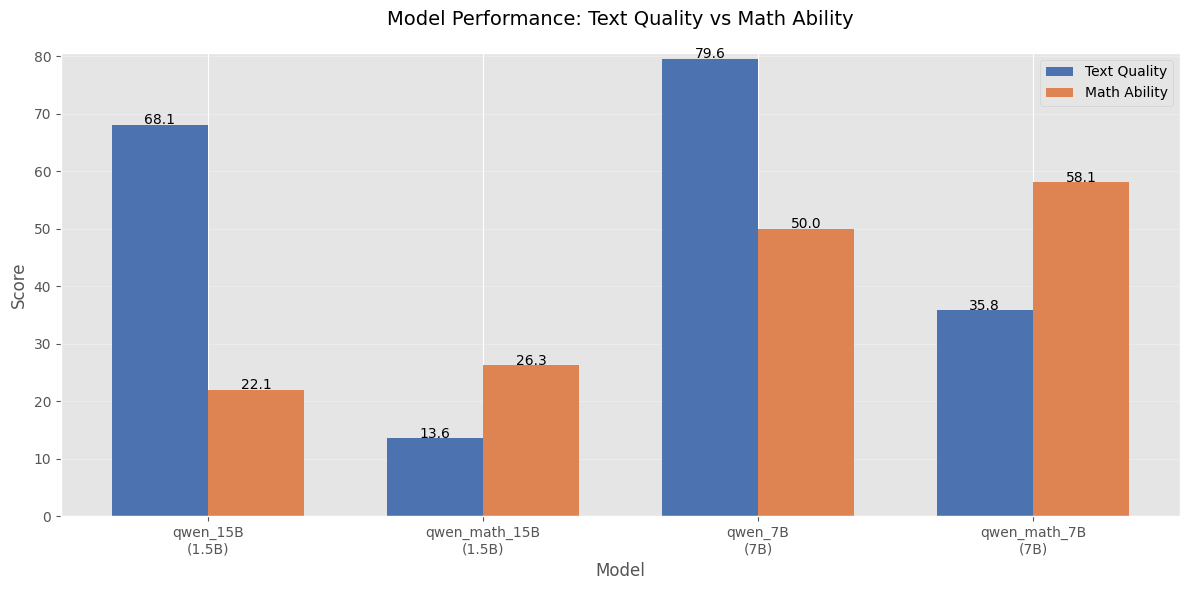

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 数学能力得分
math_scores = {
    "qwen_15B": 22.05,
    "qwen_math_15B": 26.28,
    "qwen_7B": 50,
    "qwen_math_7B": 58.08
}

# 文本质量得分
text_quality_scores = {
    "qwen_15B": np.mean(generate_eval_data_dict["qwen_15B"]['score']),
    "qwen_math_15B": np.mean(generate_eval_data_dict["qwen_math_15B"]['score']),
    "qwen_7B": np.mean(generate_eval_data_dict["qwen_7B"]['score']),
    "qwen_math_7B": np.mean(generate_eval_data_dict["qwen_math_7B"]['score'])
}

# 创建DataFrame
data = {
    "Model": ["qwen_15B", "qwen_math_15B", "qwen_7B", "qwen_math_7B"],
    "Text Quality": [text_quality_scores["qwen_15B"], text_quality_scores["qwen_math_15B"], 
                     text_quality_scores["qwen_7B"], text_quality_scores["qwen_math_7B"]],
    "Math Ability": [math_scores["qwen_15B"], math_scores["qwen_math_15B"], 
                     math_scores["qwen_7B"], math_scores["qwen_math_7B"]],
    "Params": ["1.5B", "1.5B", "7B", "7B"]
}
df = pd.DataFrame(data)

# 设置绘图
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(12, 6))

# 柱状图参数
bar_width = 0.35
x = np.arange(len(df))  # 每个模型一个独立位置
colors = {"Text Quality": "#4C72B0", "Math Ability": "#DD8452"}

# 绘制每个模型的两个柱子
for i, metric in enumerate(["Text Quality", "Math Ability"]):
    ax.bar(
        x + i * bar_width,  # 并列显示
        df[metric],
        width=bar_width,
        color=colors[metric],
        label=metric
    )

# 添加标签和标题
ax.set_xticks(x + bar_width/2)
ax.set_xticklabels([f"{row['Model']}\n({row['Params']})" for _, row in df.iterrows()])
ax.set_xlabel("Model", fontsize=12)
ax.set_ylabel("Score", fontsize=12)
ax.set_title("Model Performance: Text Quality vs Math Ability", fontsize=14, pad=20)
ax.legend(loc="upper right", fontsize=10)

# 显示数值标签
for i in range(len(df)):
    for j, metric in enumerate(["Text Quality", "Math Ability"]):
        value = df.loc[i, metric]
        ax.text(
            x[i] + j * bar_width,
            value + 0.1,
            f"{value:.1f}",
            ha="center",
            fontsize=10,
            color='black'
        )

# 调整布局
plt.grid(axis='y', alpha=0.3)
plt.ylim(0, max(df["Math Ability"].max(), df["Text Quality"].max()) + 1)
plt.tight_layout()
plt.savefig('../data/figure//model_comparison_math_model.png', dpi=300, bbox_inches='tight')
plt.show()

## Closed Models

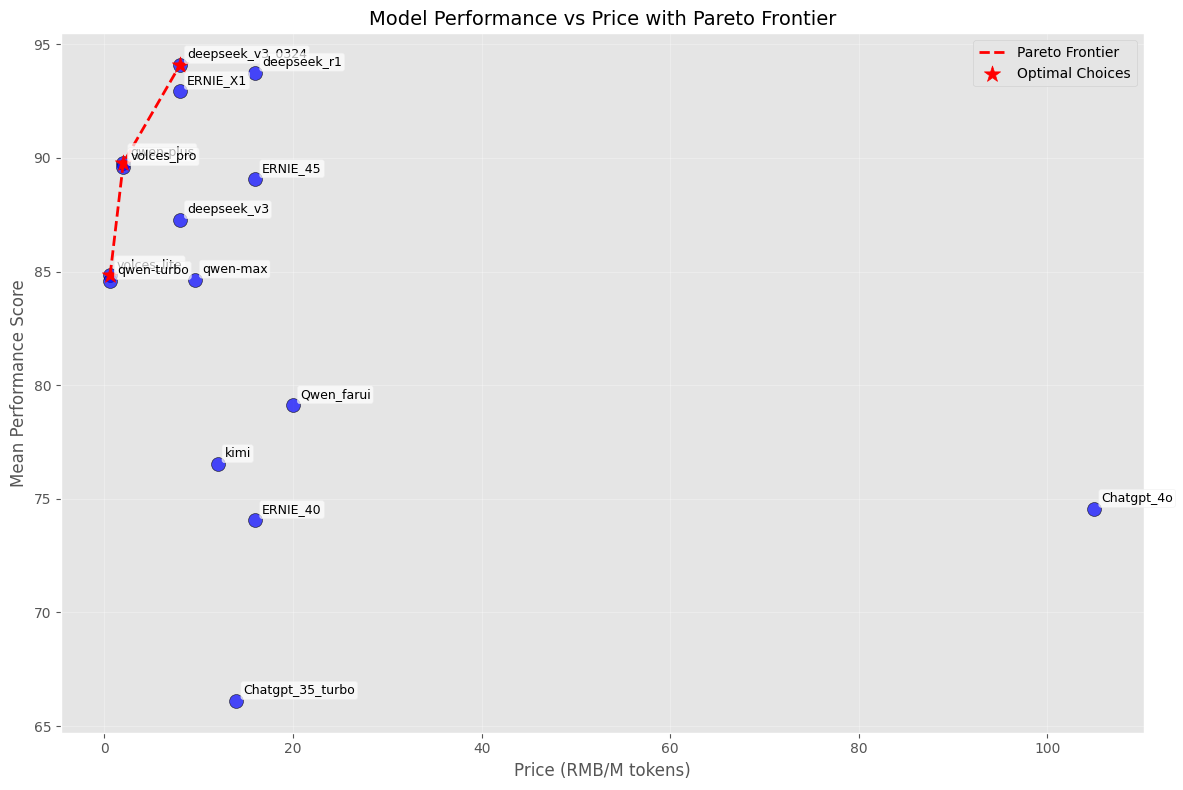

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import ConvexHull
import pandas as pd

# 假设的数据（替换为您的实际数据）


price_dict = {
    "volces_lite": 0.0006 * 1000,
    "volces_pro": 0.002 * 1000,
    "kimi": 0.012 * 1000,
    "qwen-max": 0.0096 * 1000,
    "qwen-plus": 0.002 * 1000,
    "qwen-turbo": 0.0006 * 1000,
    "Qwen_farui": 0.02*1000,
    "deepseek_v3": 0.008 * 1000,
    "deepseek_v3_0324": 8,
    "deepseek_r1": 16,
    "ERNIE_X1": 0.008 * 1000,
    "ERNIE_45": 0.016*1000,
    "ERNIE_40": 0.016*1000,
    "Chatgpt_35_turbo": 0.002 * 7 *1000,
    "Chatgpt_4o": 0.015 * 7 *1000
}

# 创建DataFrame
model_stats = []
for model in price_dict.keys():
    mean_score = np.mean(generate_eval_data_dict[model]['score'])
    model_stats.append({
        "model": model,
        "mean_score": mean_score,
        "price": price_dict[model],
        "score_per_dollar": mean_score / price_dict[model]
    })

df = pd.DataFrame(model_stats).sort_values("price")

# 计算凸包
points = df[["price", "mean_score"]].values
hull = ConvexHull(points)

# 改进的帕累托前沿提取
def get_pareto_frontier(points, models):
    pareto = []
    for i in range(len(points)):
        dominated = False
        for j in range(len(points)):
            if (points[j,0] < points[i,0] and points[j,1] >= points[i,1]) or \
               (points[j,0] <= points[i,0] and points[j,1] > points[i,1]):
                dominated = True
                break
        if not dominated:
            pareto.append((points[i], models[i]))
    
    # 按价格排序
    pareto_sorted = sorted(pareto, key=lambda x: x[0][0])
    return np.array([x[0] for x in pareto_sorted]), [x[1] for x in pareto_sorted]

pareto_points, pareto_models = get_pareto_frontier(points, df["model"].values)

# 可视化
plt.figure(figsize=(12, 8))

# 绘制所有模型点（取消颜色映射）
scatter = plt.scatter(df["price"], df["mean_score"], 
                     color='blue',  # 统一颜色
                     s=100, alpha=0.7, edgecolors='k')

# 标注所有数据点的名称
for i, row in df.iterrows():
    plt.annotate(row["model"], 
                xy=(row["price"], row["mean_score"]),
                xytext=(5, 5),  # 偏移量
                textcoords='offset points',
                fontsize=9,
                bbox=dict(boxstyle='round,pad=0.2', fc='white', alpha=0.7))

# 绘制帕累托前沿
plt.plot(pareto_points[:,0], pareto_points[:,1], 
         'r--', lw=2, label='Pareto Frontier')

# 标记最优解
plt.scatter(pareto_points[:,0], pareto_points[:,1], 
            c='red', s=150, marker='*', label='Optimal Choices')

# 添加标签和标题
plt.xlabel('Price (RMB/M tokens)', fontsize=12)
plt.ylabel('Mean Performance Score', fontsize=12)
plt.title('Model Performance vs Price with Pareto Frontier', fontsize=14)
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.savefig('../data/figure//model_comparison_close_model.png', dpi=300, bbox_inches='tight')
# 显示图形（已移除colorbar）
plt.show()

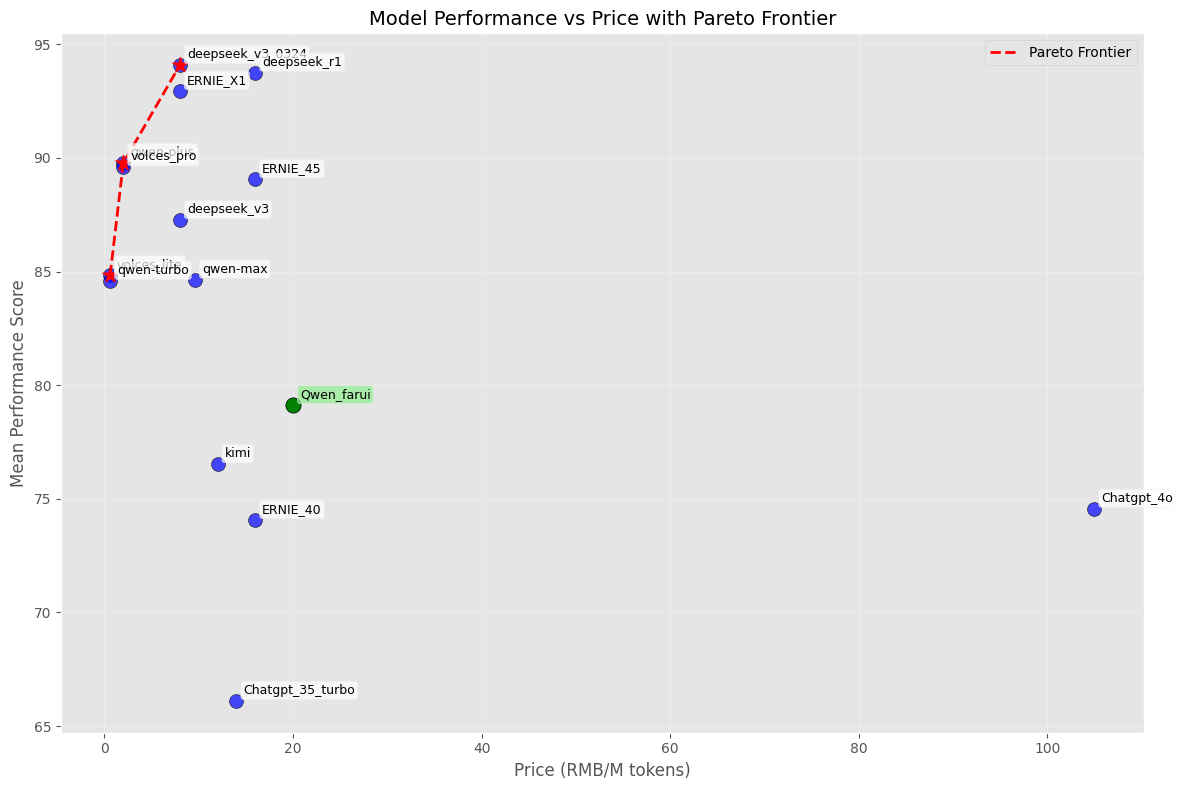

In [ ]:
# 可视化
plt.figure(figsize=(12, 8))

# 绘制所有模型点（普通模型用蓝色）
for i, row in df.iterrows():
    if row["model"] == "Qwen_farui":
        color = 'green'  # 特殊颜色
        size = 120       # 稍大的点
        alpha = 1.0       # 不透明
    else:
        color = 'blue'
        size = 100
        alpha = 0.7
    plt.scatter(row["price"], row["mean_score"], 
                color=color, s=size, alpha=alpha, edgecolors='k')

# 标注所有数据点的名称
for i, row in df.iterrows():
    bbox_props = dict(boxstyle='round,pad=0.2', fc='white', alpha=0.7)
    if row["model"] == "Qwen_farui":
        bbox_props['fc'] = 'lightgreen'  # 浅绿色背景突出显示
    plt.annotate(row["model"], 
                xy=(row["price"], row["mean_score"]),
                xytext=(5, 5),  # 偏移量
                textcoords='offset points',
                fontsize=9,
                bbox=bbox_props)

# 绘制帕累托前沿
plt.plot(pareto_points[:,0], pareto_points[:,1], 
         'r--', lw=2, label='Pareto Frontier')

# 标记最优解（如果Qwen_farui在帕累托前沿上，保持红色星星）
for i, (point, model) in enumerate(zip(pareto_points, pareto_models)):
    if model == "Qwen_farui":
        plt.scatter(point[0], point[1], c='green', s=200, marker='*', 
                   label='Qwen_farui (Optimal)' if model in pareto_models else 'Qwen_farui')
    else:
        plt.scatter(point[0], point[1], c='red', s=150, marker='*', 
                   label='_nolegend_')  # 其他最优解不重复显示图例

# 添加标签和标题
plt.xlabel('Price (RMB/M tokens)', fontsize=12)
plt.ylabel('Mean Performance Score', fontsize=12)
plt.title('Model Performance vs Price with Pareto Frontier', fontsize=14)
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.savefig('../data/figure//model_comparison_close_model.png', dpi=300, bbox_inches='tight')
plt.show()

## Open Models

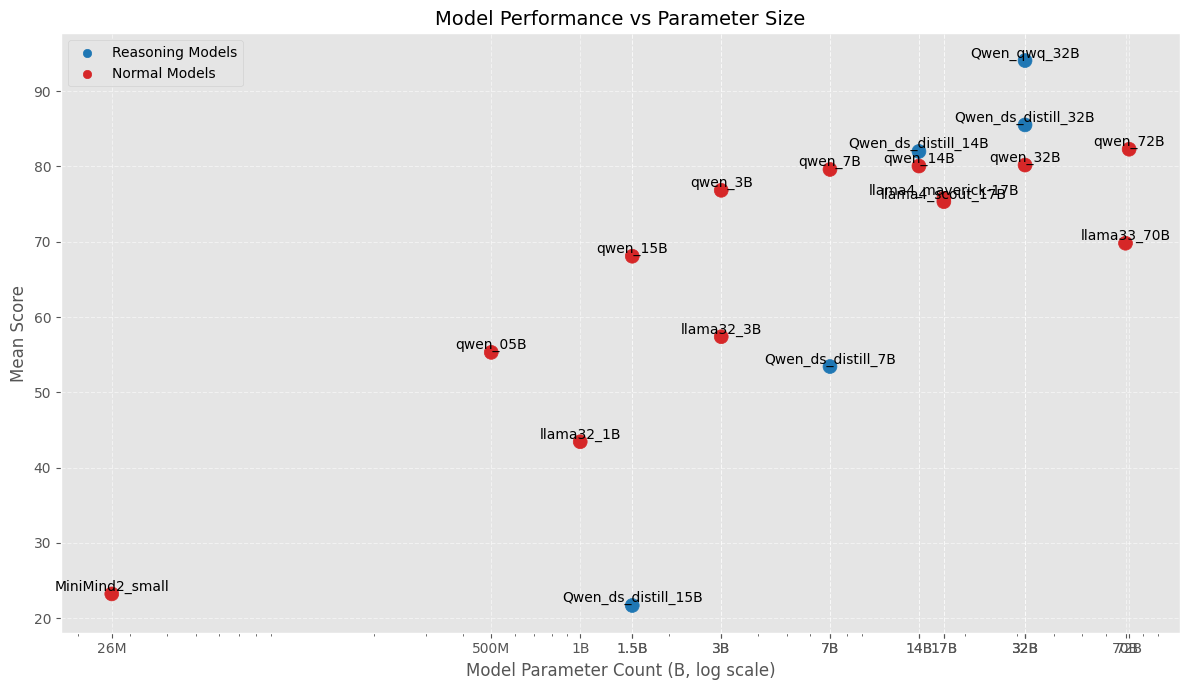

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 数据准备
param_counts = {
    'MiniMind2_small': 0.026,
    'qwen_05B': 0.5,
    'qwen_15B': 1.5,
    'qwen_3B': 3,
    'qwen_7B': 7,
    'qwen_14B': 14,
    'qwen_32B': 32,
    'qwen_72B': 72,
    'llama4_scout_17B': 17,
    'llama4_maverick-17B': 17,
    'llama33_70B': 70,
    'Qwen_qwq_32B': 32,
    'Qwen_ds_distill_15B': 1.5,
    'Qwen_ds_distill_7B': 7,
    'Qwen_ds_distill_14B': 14,
    'Qwen_ds_distill_32B': 32,
    'llama32_1B':1,
    'llama32_3B':3
}

# 定义reasoning模型列表
reasoning_models = ['Qwen_qwq_32B','Qwen_ds_distill_15B','Qwen_ds_distill_7B','Qwen_ds_distill_14B','Qwen_ds_distill_32B']  # 可以添加更多模型名称到这个列表

# 计算各模型均值
means = {}
for model_name, data in generate_eval_data_dict.items():
    if model_name in param_counts:
        means[model_name] = np.mean(data['score'])

# 提取坐标数据
x = []
y = []
labels = []
colors = []
for model in means.keys():
    x.append(param_counts[model])
    y.append(means[model])
    labels.append(model)
    colors.append('tab:blue' if model in reasoning_models else 'tab:red')

# 绘制散点图
plt.figure(figsize=(12, 7))
scatter = plt.scatter(x, y, c=colors, s=100)

# 标注模型名称
for xi, yi, label in zip(x, y, labels):
    plt.text(xi, yi, label, ha='center', va='bottom', fontsize=10)

# 添加图例说明
plt.scatter([], [], c='tab:blue', label='Reasoning Models')  # 蓝色图例
plt.scatter([], [], c='tab:red', label='Normal Models')       # 红色图例
plt.legend(loc='upper left')

# 设置坐标轴和标题
plt.xscale('log')
plt.xlabel('Model Parameter Count (B, log scale)', fontsize=12)
plt.ylabel('Mean Score', fontsize=12)
plt.title('Model Performance vs Parameter Size', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.5)

# 调整x轴刻度标签（自动处理M/B单位）
def format_param_count(x):
    return f"{x}B" if x >= 1 else f"{x*1000:.0f}M"

plt.xticks(list(param_counts.values()), 
           [format_param_count(v) for v in param_counts.values()])

plt.savefig('../data/figure/model_comparison_open_model.png', dpi=300, bbox_inches='tight')

plt.tight_layout()
plt.show()

## Output tokens length

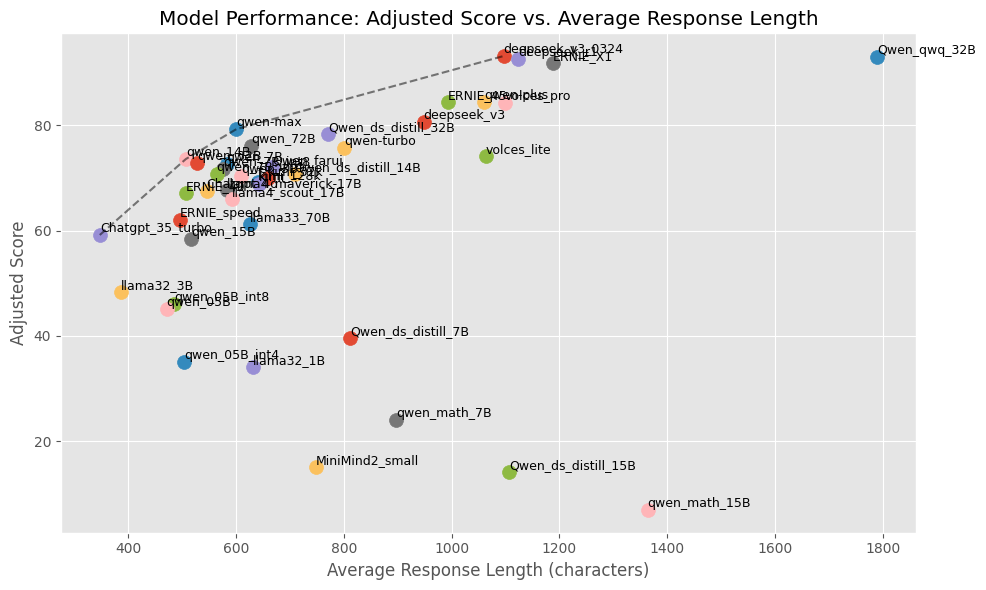

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def cv_adjusted_score(mean, std):
    """基于变异系数调整的评分"""
    cv = std / mean  # 变异系数 = 标准差/均值
    return mean / (1 + cv)  # 调整公式：分数 = 均值/(1+CV)

# 计算并排序
scored_models = []
for model, data in generate_eval_data_dict.items():
    scores = np.array(data['score'])
    contents = data['content']
    
    # 计算得分统计量
    mean = np.mean(scores)
    std = np.std(scores)
    adj_score = cv_adjusted_score(mean, std)
    
    # 计算平均回复长度（按字符数计算）
    avg_length = np.mean([len(str(content)) for content in contents])
    
    scored_models.append({
        'model': model,
        'mean_score': mean,
        'std_score': std,
        'adj_score': adj_score,
        'avg_length': avg_length
    })

# 按调整后分数排序
scored_models.sort(key=lambda x: x['adj_score'], reverse=True)

# First plot the scatter plot as before
plt.figure(figsize=(10, 6))
plt.title('Model Performance: Adjusted Score vs. Average Response Length')
plt.xlabel('Average Response Length (characters)')
plt.ylabel('Adjusted Score')

# Draw all points and labels
for item in scored_models:
    plt.scatter(item['avg_length'], item['adj_score'], s=100)
    plt.text(item['avg_length'], item['adj_score'], item['model'], 
             fontsize=9, ha='left', va='bottom')

# Now add the dashed line connecting specific models
models_to_connect = ['Chatgpt_35_turbo', 'qwen_14B', 'qwen-max', 'deepseek_v3_0324']

# Get coordinates for these models
connect_points = []
for model in models_to_connect:
    for item in scored_models:
        if item['model'] == model:
            connect_points.append((item['avg_length'], item['adj_score']))
            break

# Unzip the coordinates for plotting
x_vals, y_vals = zip(*connect_points)

# Plot the dashed line connecting these points
plt.plot(x_vals, y_vals, 'k--', alpha=0.5)  # 'k--' means black dashed line

plt.grid(True)
plt.tight_layout()

plt.savefig('../data/figure/model_comparison_output_tokens.png', dpi=300, bbox_inches='tight')
plt.show()

## 得分排名

In [2]:
import numpy as np

def cv_adjusted_score(mean, std):
    """基于变异系数调整的评分"""
    cv = std / mean  # 变异系数 = 标准差/均值
    return mean / (1 + cv)  # 调整公式：分数 = 均值/(1+CV)

# 计算并排序
scored_models = []
for model, data in generate_eval_data_dict.items():
    scores = np.array(data['score'])
    mean = np.mean(scores)
    std = np.std(scores)
    adj_score = cv_adjusted_score(mean, std)
    scored_models.append((model, mean, std, adj_score))

# 按调整后分数排序
scored_models.sort(key=lambda x: x[3], reverse=True)

# 打印结果
print(f"{'Model':<20} {'Mean':>8} {'Std':>8} {'AdjScore':>10}")
for model, mean, std, adj in scored_models:
    print(f"{model:<20} {mean:8.2f} {std:8.2f} {adj:10.2f}")

Model                    Mean      Std   AdjScore
deepseek_v3_0324        94.09     0.93      93.16
Qwen_qwq_32B            94.06     1.06      93.01
deepseek_r1             93.76     1.23      92.54
qwen3-14b               93.25     1.17      92.09
ERNIE_X1                92.95     1.12      91.85
qwen3-235b-a22b         93.38     1.65      91.76
qwen3-32b               93.04     1.48      91.58
qwen3-30b-a3b           92.87     1.62      91.28
qwen3-1.7b              92.66     2.06      90.65
qwen3-4b                92.61     2.60      90.08
qwen-plus               89.78     5.77      84.36
ERNIE_45                89.07     4.99      84.34
volces_pro              89.59     5.73      84.21
deepseek_v3             87.27     7.08      80.72
qwen-max                84.65     5.72      79.29
Qwen_ds_distill_32B     85.51     7.74      78.42
qwen_72B                82.29     6.73      76.07
qwen-turbo              84.59    10.04      75.62
volces_lite             84.84    12.14      74.22


In [10]:
print(generate_eval_data_dict['deepseek_v3_0324']['content'][0])

《刑法》第一百三十七条（工程重大安全事故罪）和第一百三十八条（教育设施重大安全事故罪）均属于危害公共安全类犯罪，但二者在犯罪主体、行为对象和具体行为方式上存在显著区别，同时也有责任形式和危害后果上的共同点。以下是具体分析：

---

### **一、主要区别**
1. **犯罪主体不同**  
   - **第137条（工程重大安全事故罪）**：主体是特殊主体，即建设单位、设计单位、施工单位、工程监理单位的直接责任人员（单位犯罪的双罚制）。  
   - **第138条（教育设施重大安全事故罪）**：主体是学校、教育机构或其他对教育设施安全负有直接责任的人员（如学校管理人员、教育行政部门人员等）。

2. **行为对象不同**  
   - **第137条**：针对的是建设工程（如房屋、桥梁、道路等），要求违反国家规定降低工程质量标准。  
   - **第138条**：针对的是教育设施（如校舍、教学楼、操场等），要求明知存在危险而不采取措施或不及时报告。

3. **行为方式不同**  
   - **第137条**：表现为“降低工程质量标准”（如偷工减料、使用不合格材料等），通常与经济利益驱动相关。  
   - **第138条**：表现为“明知校舍或教育设施有危险而不采取措施或不报告”，属于不作为犯罪（消极放任危险）。

4. **主观方面差异**  
   - **第137条**：主观上多为过失，但可能存在间接故意（放任结果发生）。  
   - **第138条**：要求“明知”危险存在（故意不作为），但对严重后果可能是过失。

---

### **二、共同点**
1. **责任形式**  
   - 两罪均要求对重大安全事故的发生具有过失（或间接故意），且均追究直接责任人员的刑事责任。

2. **危害后果**  
   - 均以“造成重大安全事故”为构成要件（如人员伤亡、财产损失等），需达到法律规定的严重程度。

3. **侵犯客体**  
   - 均危害公共安全，侵害不特定多数人的生命、健康或重大财产安全。

4. **法定刑相似**  
   - 两罪的量刑幅度基本一致：造成严重后果的，处5年以下有期徒刑或拘役；后果特别严重的，处5年以上10年以下有期徒刑。

---

### **三、实务中的区分要点**
- **关键判断标准**：  
  

In [11]:
print(generate_eval_data_dict['deepseek_v3_0324']['reasoning'][0])

内容紧扣题目准确分析了两种重大安全事故罪的区别与共同点，专业知识准确，回答有深度且联想有一定广度，文本逻辑性强。结构清晰，条理分明，层次感好。语言表达流畅，语法正确，风格适配。整体表现出色，几乎无缺点，仅在部分表述上可更精炼，如“主观方面差异”部分。


In [12]:
print(generate_eval_data_dict['deepseek_v3_0324']['score'][0])

93.61692070960999
